# Ford Go Bike Trip Data
## by Nick Smith

## Preliminary Wrangling

For this project I chose to look at the Ford GoBike data from 2017. The data shows bikeshare usage for Ford's GoBike system in the San Fransisco Bay Area which includes San Fransisco city, the East Bay, and San Jose.

The program offers multiple types of subscriptions, as well as access for casual customers. This project will examine the types of subscribers that use the program and their biking habits to get a sense for who is using the service and when. This should give us a basic understanding of how well the program was running at the time. I will also see if the data is missing critical data points that could possibly be collected to provide greater insight. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Read the data into a Dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
#Examine the types of data collected
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


For this analysis, we want to see what types of customers are using the bike share program and how well the program is doing. For our purposes, we will need the examine the duration, start_time, end_time, user_type data, and possibly the bike_id. But first, lets make sure we have the right data types and see if there are any missing data. We can also drop the lat/long data since we won't be using it. We can hang on to the other columns just in case we think they might help us later.


In [4]:
#Our dataframe is massive with nearly 520,000 rows and 13 columns
df.shape

(519700, 13)

In [5]:
#Looking at the data types shows us we need to change the dates and times to
# datetime data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [6]:
#Now lets check for any null values in the data
df.isnull().sum()
#Looks like we don't have to worry about filling any data gaps in this dataset!

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [7]:
#Lets go ahead and drop the lat/long columns that we won't be using
df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [8]:
df.head(1)
#Good those are gone, lets look at the stats for our dataset and see what it tells us


,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer


In [9]:
df.describe()
#This gives us some good reference points for our biking duration, which is the most important.
#The remaining data are all static numbers so the stats computed below don't provide
#any additional value.

,duration_sec,start_station_id,end_station_id,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,92.184041,1672.533079
std,3444.146451,86.083078,84.969491,971.356959
min,61.000000,3.000000,3.000000,10.000000
25%,382.000000,24.000000,23.000000,787.000000
50%,596.000000,67.000000,66.000000,1728.500000
75%,938.000000,139.000000,134.000000,2520.000000
max,86369.000000,340.000000,340.000000,3733.000000


In [10]:
#Lets check and see how many types of users the program has:
df['user_type'].value_counts()



Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

It looks like there are significantly more subscribers than random customers, almost by a factor of four. This indicates that more people use the program consistently than for one off occasions.

This would also indicate that the program is likely primarily used by commuters. My educated case would be this is the most likely scenario since San Fransisco is a communter city. 

Now lets see how many bike_id unique values there are.

In [11]:
df['bike_id'].value_counts()

68      457
2178    426
210     408
813     403
602     402
       ... 
302       1
501       1
2609      1
3323      1
3723      1
Name: bike_id, Length: 3673, dtype: int64

It appears there are some bike IDs with many instances in the dataset while others have very few. This might indicate that bikes ID might be coded to indicate a bike's age, wear, location (SF, East Bay, SJ), or time in cirulation. This might suggest that some bikes are taken out of circulation or given a new ID as they age or are redistributed. One confusing point is that there are some bike IDs that are high numbers that also correlate to a high bike count rate. Since its not entirely clear from the data what this means we may have to plot this data to see if it correlates to any of our other bike data. 

In order to get a better sense of what the bike program usage looks like, lets convert our start time column to represent days of the week. While start/end time is nice to see bike usage, it would be better to look at aggregate usage by day and compare days of the week to see the true difference between customers and subscribers.

In [12]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [13]:
df['day'] = df['start_time'].apply(lambda x: x.strftime('%A').lower())
days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday','sunday']
df['day'] = pd.Categorical(df['day'],categories= days, ordered = True)

In [14]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,day
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,sunday
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer,sunday
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,245,Downtown Berkeley BART,1094,Customer,sunday
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.5310,60,8th St at Ringold St,5,Powell St BART Station (Market St at 5th St),2831,Customer,sunday
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,247,Fulton St at Bancroft Way,3167,Subscriber,sunday


In [15]:
df.shape

(519700, 10)

### What is the structure of your dataset?

Our orginal dataset had 519,700 rows and 13 columns. I dropped the lat/long columns as I won't need them for the analysis I am conducting. 

### What is/are the main feature(s) of interest in your dataset?

The main features I plan to examine include in our visualatuion analysis are the days of the week each bike was used, what the most common trip durations lengths were, customer types to determine what types of customers use the program the most and when, and which bikes were used the most.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The duration column should provide some good insight into the variance in usages times though will likely need to graphed logrithmically. 

The fact that some bike ids have many usages should give some insight into whether certain bikes are being used more frequently and then phased out. 

The binary nature of the user_type data should provide a great comparison point to see who the program is most used by and how better Ford can target the demographic that is using the service the least.

## Univariate Exploration


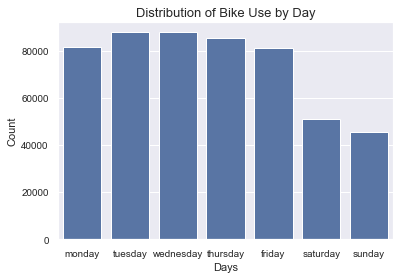

In [18]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'day', color = base_color)
sb.set(font_scale=0.90)
plt.title('Distribution of Bike Use by Day',size=13)
plt.xlabel('Days',size=11)
plt.ylabel('Count',size=11);

Looking at the distribution of bike rentals by day confirms some early assumptions we made. Namely, that this program likely targets commuters. The high use of bike share bikes during the weekdays would indicate that more people use the program to get to work. If this is really the case, we would expect to see a higher rate of Customer types users on the weekends rather than subscribers. We will examine this more in the Bivariate analysis.

We could also look at this data in a pie chart to get a better idea of what percentage of users are using the program by day using percentages:

Text(0.5, 1.0, 'Distribution of Bike Use by Day')

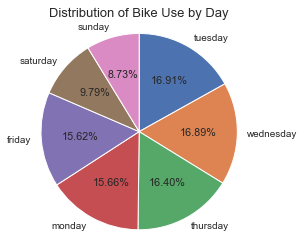

In [19]:
day_count = df['day'].value_counts()
plt.pie(day_count, labels = day_count.index, startangle = 90,
 counterclock = False,autopct='%.2f%%');
plt.axis('square')
plt.title('Distribution of Bike Use by Day',size=13)

This pie chart actually provides us some greater insight than the bar chart. Now we can see that the bike share program is used almost twice as much during the week than it is during the weekend. This might indicate that Ford might look into ways to encourage more bike use for Saturdays and Sundays.

Next, lets look at the most common trip duration lengths:

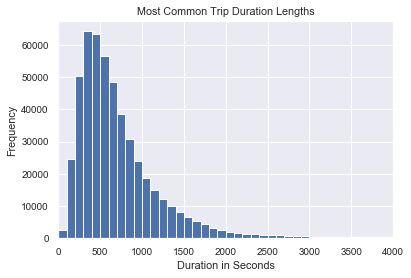

In [17]:
bin_edges = np.arange(0, df['duration_sec'].max()+100, 100)
plt.hist(data = df, x = 'duration_sec', bins = bin_edges)
plt.xlim(0,4000)
plt.title('Most Common Trip Duration Lengths')
plt.xlabel('Duration in Seconds')
plt.ylabel('Frequency');

Interestingly, the vast majority of bike usage lasts approximately 4-16 minutes (250-1000 seconds). This obviously tells us that most bike share use helps people travel short distances. It would help to know how close bike share users live to their places of work as this information would help us determine whether or not these users are indeed commuters. It may be helpful to split the idea of "commuters" into two types: long-distance and short-distance. Unfortunately, we don't have the data to make this distinction as we don't know where users work and where they live exactly. In the bivariate analysis, maybe if we compare trip lengths to bike ID it may give us a sense of whether the two are connected. Lets look at the distrbution of bike ID use first:

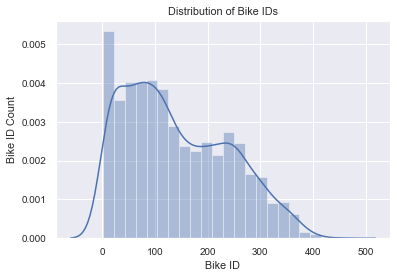

In [43]:
sb.distplot(df['bike_id'].value_counts())
plt.title('Distribution of Bike IDs')
plt.xlabel('Bike ID')
plt.ylabel('Bike ID Count');

This graph really generates some questions. It seems that there are larger numbers of bikes with low numerical ID numbers. As I orginally suggested, maybe the bike ID indicates the age of the bike as a higher frequency of a singular bike ID might indicate batches of new bikes added to the fleet. We will definitely have to compare this to our other data to make sure. 

Finally, lets look at the usage rates between different program user types:


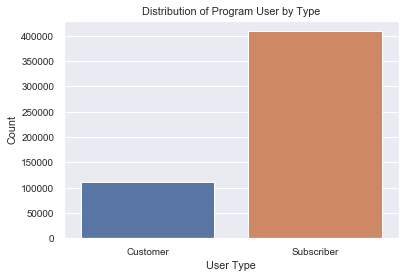

In [23]:
sb.countplot(data = df, x = 'user_type')
plt.title('Distribution of Program User by Type')
plt.xlabel('User Type')
plt.ylabel('Count');

This chart is fairly simple to understand. The majority of program users subscribe to the program. This is to be expected if we can conclude based on the use by day of the week indicates the program is primarily used by commuters. People who use the program daily would obviously want to subscribe to the program, likely for cost saving purposes. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Our primary variables of interest showed some interesting distributions that allow us to begin answering some questions:

1. Bike Use by Day: The distribution of use primarily over the work week indicates to us that people likely use the program as a means to get to and from work, or some combination thereof. When plotting this in a pie chart, we see the difference between weekdays and weekends is almost twice as much which lends credence to this hypothesis. 

2. Trip Durations: The fact that trip durations most commonly last 4-16 minutes would suggest that people are not traveling great distances. If we had additional data repeated data, like a user ID, this might help us determine patterns of life and would give us a better opportunity to use the lat/long data to see if certain users make the same trips every day of the week at the same times. 

3. Program User Distribution: While simple, this graph confirms that repeat customers are the bread and butter for Ford's program. It also suggests that users use the program repeatedly, lending more credence to the commuter theory if that is a subscriber's primary method of getting to work. 

Unusual points:

1. Bike ID Data: The bike ID data distribution is quite strange, I'm not sure exactly what its trying to tell us. Since the frequency of a bike's use goes down as the bike ID number goes up it is really difficult to tell if this is a method that Ford uses to log specific use characteristics of a bike such as age, wear and tear, or redistribution. This may become more clear later. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The only major change to one of these features what the shift from a bar chart for the Bike Use by Day plot to a pie chart. This gave us a more visually understandable representation of how bike use is distributed. This did not require any adjustments to the data, other than coding the start_time for the day of the week. 

## Bivariate Exploration


Lets compare the number of times each user type used the program on specific days of the week:

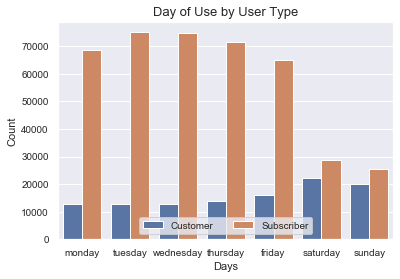

In [25]:
ax = sb.countplot(data = df, x = 'day', hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 50)
plt.title('Day of Use by User Type',size=13)
plt.xlabel('Days',size=11)
plt.ylabel('Count',size=11);

As we would have expected if thinking about the program as commuter focused, program subscribers use the bike share program way more during the weekdays than one off customers. Interestingly though, the random customers use the bike share program at almost the same rate on the weekends as subscribers. Again, this adds additional evidence to the theory that subscribers are commuters and that Ford could work to gain the business of more overall customers on the weekends. Maybe we can gain a little more insight if we look at the length of time that each customer type is using the program overall:

Text(0, 0.5, 'Duration (Sec)')

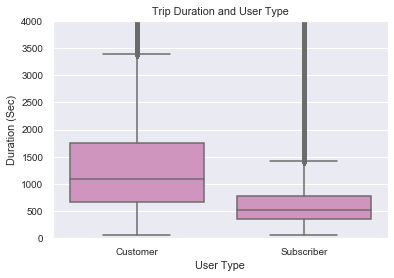

In [42]:
base_color = sb.color_palette()[6]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([0, 4000])
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (Sec)')

Well this is quite interesting as it appears that non-subscribers, despite mostly using the program on the weekends, have much longer usage times ranging from just a couple minutes up to just under 1 hour. As I've mentioned several times, if Ford was trying to use this data to increase its non-subscriber users to use their program more it would be helpful to know the cost of the bikers per minute/hour versus what the cost of a subscription is. Since we don't have that data we wouldn't be able to recommend specific actions to increase usage by non-subscribers as Ford may be making more money off the customers per minute of usage than they are off their subscribers who use the program for, on average, around 8 minutes per day. 

Finally, lets see if we can pull any insights from the from the bike ID data when comparying it to other data.

*Note, I tried comparing the bike ID data to most of our other data points. They resulting graphs were both difficult to read and provided no insights at all. Those will not be included and we will examine the single graph below. While still confounding, it does at least tell us something. 

[None]

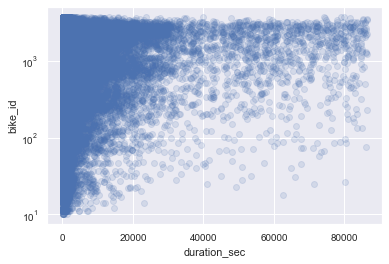

In [36]:
splot = sb.regplot(x="duration_sec", y="bike_id", 
                    data=df,
                    scatter_kws={'alpha':0.15},
                    fit_reg=False)
splot.set(yscale="log")

Again, the bike ID is difficult to draw conclusions for. We can see that bike with higher numerical IDs eventually get used less, however, this doesn't really provide us with enough information to draw concrete conclusions. For now I think we can look at this data as a wash for creating actionable insights. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. User Type by Day of Week: This comparison showed us that program subscribers use the program significantly more than one off customers during the week. On the weekends, the usage rates come close to being similar, though subscribers still have a bit of a lead in usage rates. 

2. User Type by Duration: When comparing how long the two groups use the bikes they rent, we see the one off customers spend way more time actually using the service than the subscribers do. It would be helpful to know what the rate per minute for bike usage is to draw additional conclusions for business purposes. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

3. As I mentioned at the beginning of the project the bike ID data was not a main feature we wanted to look at, bit it was interesting enough to include. What I found was that it actually didn't provide any conclusive insights on what the bike ID numbers signify, and what impact that may have on the other data. I'm going to call this comparison a wash, but I included it for illustrative purposes. 

## Multivariate Exploration



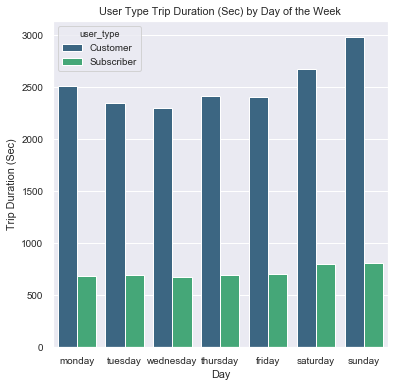

In [45]:
plt.figure(figsize = [6,6]);
axx = sb.barplot(data=df,x='day',y='duration_sec',hue='user_type', palette='viridis', ci=None);
plt.xlabel('Day');
plt.ylabel('Trip Duration (Sec)');
plt.title('User Type Trip Duration (Sec) by Day of the Week');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

As we saw in the bivariate comparison, even when we include the trip duration for comparing user type again day of the week and trip duration we see that non-subscribers are still using the program for significantly longer period of time than regular subscribers even though subscribers use the bikes at much higher rates during weekdays. This comparison would give us much needed insight for making business decisions based on pricing structures for non-subscribers and subscribers. 

### Were there any interesting or surprising interactions between features?

Nothing additional to note. 